<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [9]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [10]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [11]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Task 1: Become familiar with the dataset

In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Task 2: Generate Descriptive Statistics and Visualizations

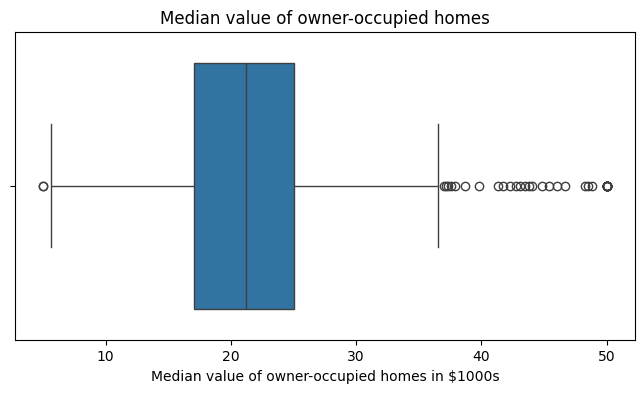

In [14]:
# boxplot for the median value of owner-ocupied homes
pyplot.figure(figsize=(8, 4))
sns.boxplot(data=boston_df, x='MEDV')
pyplot.title('Median value of owner-occupied homes')
pyplot.xlabel('Median value of owner-occupied homes in $1000s')
pyplot.show()

##### Observations:
* The median of the boxplot is ~$21,000.
* The outliers on the right indicate that there are a few very expensive houses.
* The right skew distribution indicates that there are more houses with lower values than houses with higher values.

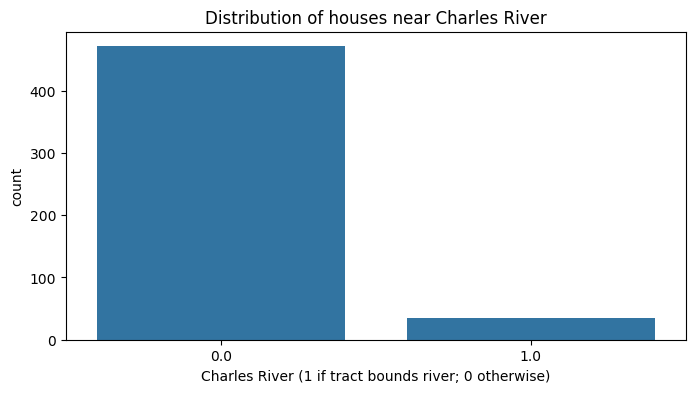

In [28]:
# bar plot for Charles river variable
pyplot.figure(figsize=(8, 4))
sns.countplot(data=boston_df, x='CHAS')
pyplot.title('Distribution of houses near Charles River')
pyplot.xlabel('Charles River (1 if tract bounds river; 0 otherwise)')
pyplot.show()

##### Observations:
* Most houses in the dataset are not located near the Charles River.
* Just a few houses are located near the river

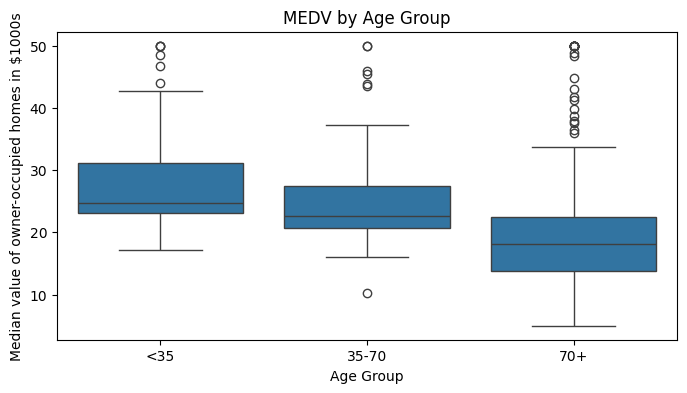

In [26]:
# discretizing AGE variable into three groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['<35', '35-70', '70+'])

# boxplot for MEDV vs AGE
pyplot.figure(figsize=(8, 4))
sns.boxplot(data=boston_df, x='AGE_GROUP', y='MEDV')
pyplot.title('MEDV by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median value of owner-occupied homes in $1000s')
pyplot.show()

##### Observations:
* Median value of houses decreases with age.
* Variability of houses increases with age.

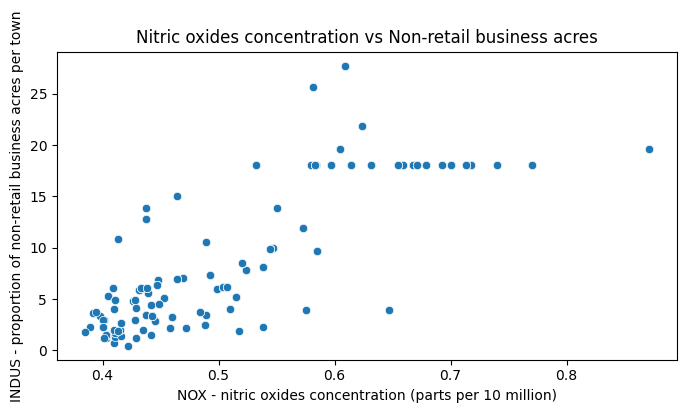

In [29]:
# scatter plot NOX vx INDUS
pyplot.figure(figsize=(8, 4))
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')
pyplot.title('Nitric oxides concentration vs Non-retail business acres')
pyplot.xlabel('NOX - nitric oxides concentration (parts per 10 million)')
pyplot.ylabel('INDUS - proportion of non-retail business acres per town')
pyplot.show()

##### Observations:
* Weak positive correlation between NOX and INDUS.
* Even though areas with higher proportions of non-retail business acres tend to have slightly higher levels of nitric oxides, the relationship is not very strong. 
* The weak relationship indicates that there may be other factors impacting the levels of nitric oxide.

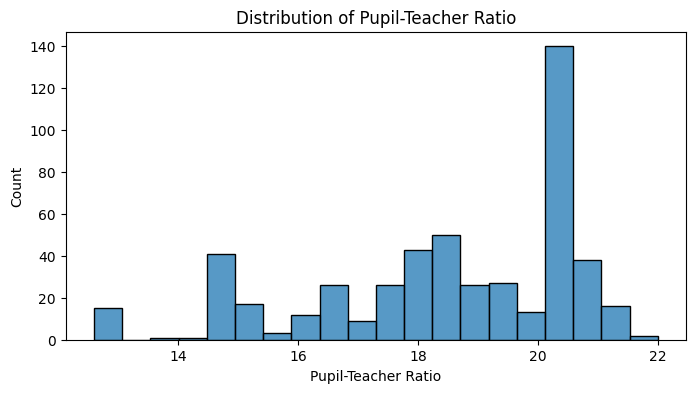

In [34]:
# histogram pupil to teacher ratio
pyplot.figure(figsize=(8, 4))
sns.histplot(data=boston_df, x='PTRATIO', bins=20)
pyplot.title('Distribution of Pupil-Teacher Ratio')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.show()

##### Observations:
* The left skew distribution indicates that most schools have higher ratios of pupils to teachers.
* The pressence of some schools where the pupil teacher ratio is lower may indicate smaller or more specialised classrooms.

### Task 3: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [38]:
# groups for houses near the river and houses not near the river
near_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_near_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# t-test
t_stat, p_value = stats.ttest_ind(near_river, not_near_river)

print("T-statistic:", t_stat)
print("p-value:", p_value)

# see if results are significant
if p_value < 0.05:
    print("There is a significant difference.")
else:
    print("There is no significant difference.")

T-statistic: 3.996437466090509
p-value: 7.390623170519905e-05
There is a significant difference.


##### Hypothesis:
* If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in median house prices between houses bounded and not bounded by the Charles River.   
* If the p-value is more than 0.05, we fail to reject the null hypothesis.
##### Conclusion after test:
* There is a significant difference in median house prices between houses near and not near the Charles River.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

In [40]:
# ANOVA model
model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)

print(anova_table)

# see if results are significant:
if anova_table['PR(>F)'][0] < 0.05:
    print("There is a significant difference.")
else:
    print("There is no significant difference.")

                 df        sum_sq      mean_sq         F        PR(>F)
C(AGE_GROUP)    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual      503.0  37314.563532    74.184023       NaN           NaN


<ipython-input-40-fe5c2a0acddd>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


There is a significant difference.


##### Hypothesis:
* If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in median house prices across different age groups.   
* If the p-value is more than 0.05, we fail to reject the null hypothesis.
##### Conclusion after test:
* There is a significant difference in median house prices across different age groups.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [41]:
# Pearson correlation coefficient
corr_coef, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

# see if results are significant:
if p_value < 0.05:
    print("There is a significant linear correlation between NOX and INDUS.")
else:
    print("There is no significant linear correlation between NOX and INDUS.")

Pearson correlation coefficient: 0.7636514469209192
p-value: 7.913361061210442e-98
There is a significant linear correlation between NOX and INDUS.


##### Hypothesis:
* If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant linear correlation between NOX and INDUS.
* If the p-value is more than 0.05, we fail to reject the null hypothesis.
##### Conclusion after test:
* There is a significant linear correlation between NOX and INDUS.

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [20]:
# linear regression model
model = sm.OLS(boston_df['MEDV'], boston_df['DIS']).fit()
model

##### Note: I was not sure how to get the regression model to work :/